In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_files_path = 'airplane_dataset/train/'
test_files_path = 'airplane_dataset/test/'

img = load_img(test_files_path + 'type-13/13-11.jpg')

In [3]:
print(img_to_array(img).shape)

(188, 216, 3)


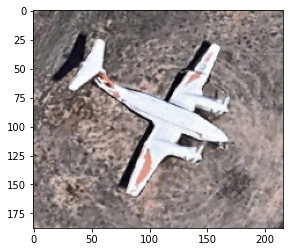

In [4]:
plt.imshow(img)
plt.show()

In [5]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size = (224, 224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size = (224, 224))

Found 3220 images belonging to 10 classes.
Found 1685 images belonging to 10 classes.


In [6]:
number_of_airplane_types = 10

## Building the model

In [7]:
vgg_model = VGG16()

In [8]:
vgg_model_layers = vgg_model.layers
print(vgg_model_layers)

[<keras.engine.input_layer.InputLayer object at 0x000002510B21A940>, <keras.layers.convolutional.Conv2D object at 0x000002510B440610>, <keras.layers.convolutional.Conv2D object at 0x000002510B440C10>, <keras.layers.pooling.MaxPooling2D object at 0x000002510B72EF10>, <keras.layers.convolutional.Conv2D object at 0x000002510B72E610>, <keras.layers.convolutional.Conv2D object at 0x000002510B744E50>, <keras.layers.pooling.MaxPooling2D object at 0x000002510B750460>, <keras.layers.convolutional.Conv2D object at 0x000002510B74A2B0>, <keras.layers.convolutional.Conv2D object at 0x000002510B75E820>, <keras.layers.convolutional.Conv2D object at 0x000002510BB75D90>, <keras.layers.pooling.MaxPooling2D object at 0x000002510B73EF10>, <keras.layers.convolutional.Conv2D object at 0x000002510BB75310>, <keras.layers.convolutional.Conv2D object at 0x000002510BB83EB0>, <keras.layers.convolutional.Conv2D object at 0x000002510BB7E820>, <keras.layers.pooling.MaxPooling2D object at 0x000002510BB831C0>, <keras.

In [9]:
vgg_model_layersize_used = len(vgg_model_layers) - 1

In [10]:
model = Sequential()
for i in range(vgg_model_layersize_used):
    model.add(vgg_model_layers[i])

In [11]:
for layers in model.layers:
    layers.trainable = False

In [12]:
model.add(Dense(number_of_airplane_types, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [14]:
batch_size = 4

model.fit_generator(train_data, steps_per_epoch = 400 // batch_size, epochs = 5, validation_data = test_data, validation_steps = 200//batch_size)

C:\Users\Public\anaconda\envs\tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 573s 6s/step - loss: 1.2134 - accuracy: 0.6515 - val_loss: 0.5402 - val_accuracy: 0.8163
Epoch 2/5
100/100 [==============================] - 581s 6s/step - loss: 0.3984 - accuracy: 0.8610 - val_loss: 0.2609 - val_accuracy: 0.9100
Epoch 3/5
100/100 [==============================] - 514s 5s/step - loss: 0.2410 - accuracy: 0.9162 - val_loss: 0.1787 - val_accuracy: 0.9381
Epoch 4/5
100/100 [==============================] - 512s 5s/step - loss: 0.1415 - accuracy: 0.9523 - val_loss: 0.1916 - val_accuracy: 0.9250
Epoch 5/5
100/100 [==============================] - 513s 5s/step - loss: 0.1229 - accuracy: 0.9577 - val_loss: 0.0954 - val_accuracy: 0.9631


In [28]:
img = Image.open('f22.jpg').resize((224, 224))

In [29]:
img = np.array(img)

In [30]:
img.shape

(224, 224, 3)

In [31]:
print(img.ndim)

3


In [32]:
img = img.reshape(-1, 224, 224, 3)

In [33]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [34]:
img  = preprocess_input(img)

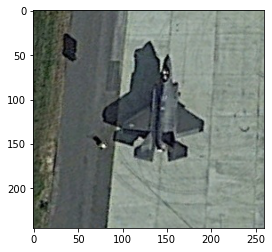

In [35]:
img_for_display = load_img('f22.jpg')
plt.imshow(img_for_display)
plt.show()

## Prediction Time

In [36]:
predictions = model.predict(img)

In [37]:
predictions

array([[2.9363653e-03, 7.2794722e-07, 9.9661666e-01, 9.4404550e-07,
        2.2992314e-08, 2.0546387e-09, 4.3410345e-04, 6.9456370e-09,
        1.1140461e-05, 6.3319590e-08]], dtype=float32)

In [38]:
image_classes = ['C-21', 'U-2', 'F-22', 'A-10', 'A-26', 'P-63', 'F-16', 'T-6', 'B-29', 'T-43']
result = np.argmax(predictions[0])
print(image_classes[result])

F-22
